In [10]:
import numpy as np
from PIL import Image
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [194]:
iter_size = 500 # number of iterations
K = 50 # number of clusters
inputName = 'input/3.jpg'
resultName = 'result/3-seg_2.jpg'

In [195]:
inputImage = Image.open(inputName)
W = inputImage.size[0] # width of image
H = inputImage.size[1] # height of image
W,H

(812, 630)

In [196]:
# Initialise data vector with attribute r,g,b,x,y for each pixel
# x , y added for near pixels similarity
# each pixel would be a sample
vector = np.ndarray(shape=(W * H, 5), dtype=float)

# Initialise vector that holds which cluster a pixel is currently in
pixelClusterNumber = np.ndarray(shape=(W * H), dtype=int)

# Populate data vector with data from input image
# vector has 5 fields: red, green, blue, x coord, y coord
for y in range(0, H):
    for x in range(0, W):
        xy = (x, y)
        rgb = inputImage.getpixel(xy)
        vector[x + y * W, 0] = rgb[0]
        vector[x + y * W, 1] = rgb[1]
        vector[x + y * W, 2] = rgb[2]
        vector[x + y * W, 3] = x
        vector[x + y * W, 4] = y

# Standarize the values of our features
vector_scaled = preprocessing.normalize(vector)

In [197]:
kmeans = KMeans(n_clusters=K,init='k-means++', max_iter=iter_size).fit(vector_scaled)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [198]:
for index, item in enumerate(labels):
    vector[index][0] = int(round(centers[item][0] * 255))
    vector[index][1] = int(round(centers[item][1] * 255))
    vector[index][2] = int(round(centers[item][2] * 255))

In [199]:
outputImage = Image.new("RGB", (W, H))
for y in range(H):
    for x in range(W):
        outputImage.putpixel((x, y), (int(vector[y * W + x][0]), 
                                int(vector[y * W + x][1]),
                                int(vector[y * W + x][2])))
outputImage.save(resultName)

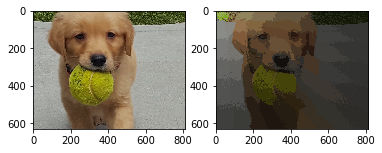

In [200]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(inputImage)
axarr[1].imshow(outputImage)